In [16]:
%matplotlib inline
import pandas as pd
import hvplot.pandas 
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
file_path = "summary_stocks_s2.csv"
stocks_s2_df = pd.read_csv(file_path, index_col=[0])
stocks_s2_df.head(10)

,security,gics_sector,gics_sub_industries,Returns,Cumulative_Return,Sharpe Ratio,Volatility,HL,Close_Open,target
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,0.060492,23.111699,8.819745,2.343571,4.859828,-0.039296,1
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.138593,103.521256,43.353604,2.331508,3.147058,0.103834,1
ABT,Abbott,Health Care,Health Care Equipment,0.060635,30.640270,14.555148,1.937340,2.383271,0.013490,1
AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0.123611,55.683461,16.245430,3.277319,3.582410,-0.043255,1
AMD,AMD,Information Technology,Semiconductors,0.139396,65.193489,17.967950,3.492412,3.741674,-0.074444,1
AMGN,Amgen,Health Care,Biotechnology,0.033419,11.563616,5.036613,1.811061,5.213098,0.072958,0
AMT,American Tower,Real Estate,Specialized REITs,0.048524,18.283085,7.513248,2.108420,6.073678,0.056072,0
AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0.055853,19.651642,7.315081,2.352625,3.881307,-0.083993,1
AVB,AvalonBay Communities,Real Estate,Residential REITs,0.027686,1.288468,-0.510931,2.257708,4.685759,-0.057183,0
BIIB,Biogen,Health Care,Biotechnology,0.008555,-26.247281,-8.227594,3.486959,8.474240,0.147246,0


In [3]:
df_s2 = pd.read_csv('summary_stocks_s2.csv')
df_s2 

,Unnamed: 0,security,gics_sector,gics_sub_industries,Returns,Cumulative_Return,Sharpe Ratio,Volatility,HL,Close_Open,target
0,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,0.060492,23.111699,8.819745,2.343571,4.859828,-0.039296,1
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.138593,103.521256,43.353604,2.331508,3.147058,0.103834,1
2,ABT,Abbott,Health Care,Health Care Equipment,0.060635,30.640270,14.555148,1.937340,2.383271,0.013490,1
3,AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0.123611,55.683461,16.245430,3.277319,3.582410,-0.043255,1
4,AMD,AMD,Information Technology,Semiconductors,0.139396,65.193489,17.967950,3.492412,3.741674,-0.074444,1
5,AMGN,Amgen,Health Care,Biotechnology,0.033419,11.563616,5.036613,1.811061,5.213098,0.072958,0
6,AMT,American Tower,Real Estate,Specialized REITs,0.048524,18.283085,7.513248,2.108420,6.073678,0.056072,0
7,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0.055853,19.651642,7.315081,2.352625,3.881307,-0.083993,1
8,AVB,AvalonBay Communities,Real Estate,Residential REITs,0.027686,1.288468,-0.510931,2.257708,4.685759,-0.057183,0
9,BIIB,Biogen,Health Care,Biotechnology,0.008555,-26.247281,-8.227594,3.486959,8.474240,0.147246,0


In [4]:
df_s2 = df_s2.rename(columns={'Unnamed: 0': 'ticker'})
df_s2

,ticker,security,gics_sector,gics_sub_industries,Returns,Cumulative_Return,Sharpe Ratio,Volatility,HL,Close_Open,target
0,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,0.060492,23.111699,8.819745,2.343571,4.859828,-0.039296,1
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.138593,103.521256,43.353604,2.331508,3.147058,0.103834,1
2,ABT,Abbott,Health Care,Health Care Equipment,0.060635,30.640270,14.555148,1.937340,2.383271,0.013490,1
3,AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0.123611,55.683461,16.245430,3.277319,3.582410,-0.043255,1
4,AMD,AMD,Information Technology,Semiconductors,0.139396,65.193489,17.967950,3.492412,3.741674,-0.074444,1
5,AMGN,Amgen,Health Care,Biotechnology,0.033419,11.563616,5.036613,1.811061,5.213098,0.072958,0
6,AMT,American Tower,Real Estate,Specialized REITs,0.048524,18.283085,7.513248,2.108420,6.073678,0.056072,0
7,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0.055853,19.651642,7.315081,2.352625,3.881307,-0.083993,1
8,AVB,AvalonBay Communities,Real Estate,Residential REITs,0.027686,1.288468,-0.510931,2.257708,4.685759,-0.057183,0
9,BIIB,Biogen,Health Care,Biotechnology,0.008555,-26.247281,-8.227594,3.486959,8.474240,0.147246,0


In [5]:
s2_df = df_s2.sort_values("gics_sector")
s2_df

,ticker,security,gics_sector,gics_sub_industries,Returns,Cumulative_Return,Sharpe Ratio,Volatility,HL,Close_Open,target
0,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,0.060492,23.111699,8.819745,2.343571,4.859828,-0.039296,1
46,TSLA,"Tesla, Inc.",Consumer Discretionary,Automobile Manufacturers,0.441502,736.935801,157.894515,4.651801,30.140515,-0.228521,1
42,SBUX,Starbucks,Consumer Discretionary,Restaurants,0.016085,-6.425242,-3.850352,2.302969,2.101628,-0.012879,0
33,NKE,"Nike, Inc.",Consumer Discretionary,"Apparel, Accessories & Luxury Goods",0.033234,4.696690,0.984325,2.290594,2.952801,-0.070313,0
7,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0.055853,19.651642,7.315081,2.352625,3.881307,-0.083993,1
30,LOW,Lowe's,Consumer Discretionary,Home Improvement Retail,0.103542,59.703875,23.709715,2.415123,4.323427,0.009484,1
23,HD,The Home Depot,Consumer Discretionary,Home Improvement Retail,0.076515,40.829919,18.146400,2.115457,6.436197,0.154898,1
20,F,Ford Motor Company,Consumer Discretionary,Automobile Manufacturers,0.091126,30.430089,8.839064,3.166409,0.428498,-0.012660,1
18,EXPE,Expedia Group,Consumer Discretionary,Internet & Direct Marketing Retail,0.036453,-16.477639,-5.251263,3.602874,5.166573,-0.120329,0
16,EBAY,eBay,Consumer Discretionary,Internet & Direct Marketing Retail,0.060773,24.292422,9.476484,2.305752,1.595540,0.033552,1


In [6]:
s2_df2 = s2_df[["ticker", "gics_sector" , "Cumulative_Return"]]
s2_df2
               

,ticker,gics_sector,Cumulative_Return
0,AAP,Consumer Discretionary,23.111699
46,TSLA,Consumer Discretionary,736.935801
42,SBUX,Consumer Discretionary,-6.425242
33,NKE,Consumer Discretionary,4.696690
7,AMZN,Consumer Discretionary,19.651642
30,LOW,Consumer Discretionary,59.703875
23,HD,Consumer Discretionary,40.829919
20,F,Consumer Discretionary,30.430089
18,EXPE,Consumer Discretionary,-16.477639
16,EBAY,Consumer Discretionary,24.292422


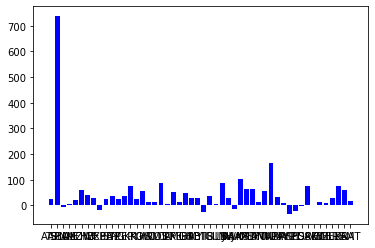

<Figure size 864x792 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

xaxis = s2_df2["ticker"]
yaxis = s2_df2["Cumulative_Return"]
plt.bar(xaxis,yaxis,color="b")
plt.figure(figsize=(12,11))
plt.show()


#s2_df2.plot.bar(figsize = (14, 23))

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


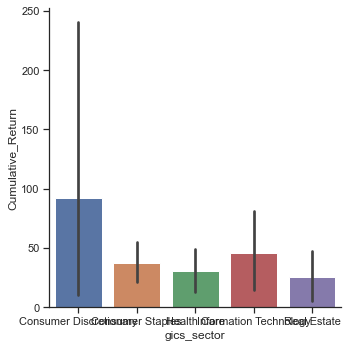

In [9]:
#s2_df2 = sns.load_dataset("titanic")
#ticker	gics_sector	Cumulative_Return

#catplot.figure(figsize=(18,18))
sns.catplot(x="gics_sector", y="Cumulative_Return", kind="bar", data=s2_df2 )
sns.set(rc = {'figure.figsize':(20,23)})


gics_sector
Consumer Discretionary    AxesSubplot(0.125,0.125;0.775x0.755)
Consumer Staples          AxesSubplot(0.125,0.125;0.775x0.755)
Health Care               AxesSubplot(0.125,0.125;0.775x0.755)
Information Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Real Estate               AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

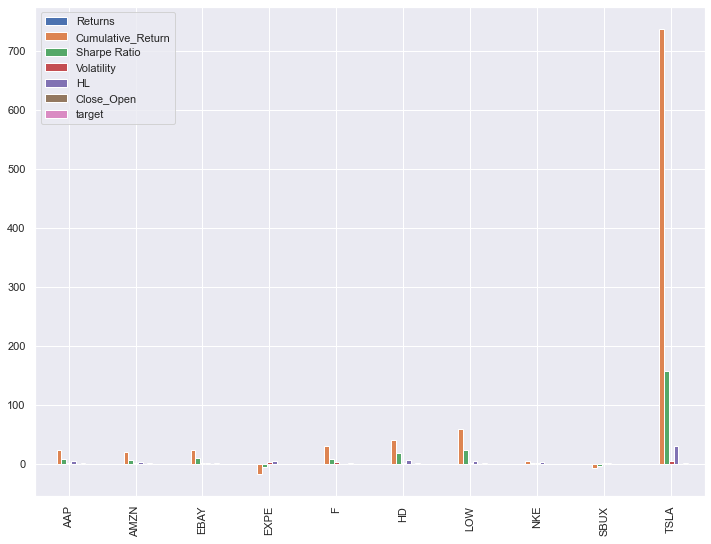

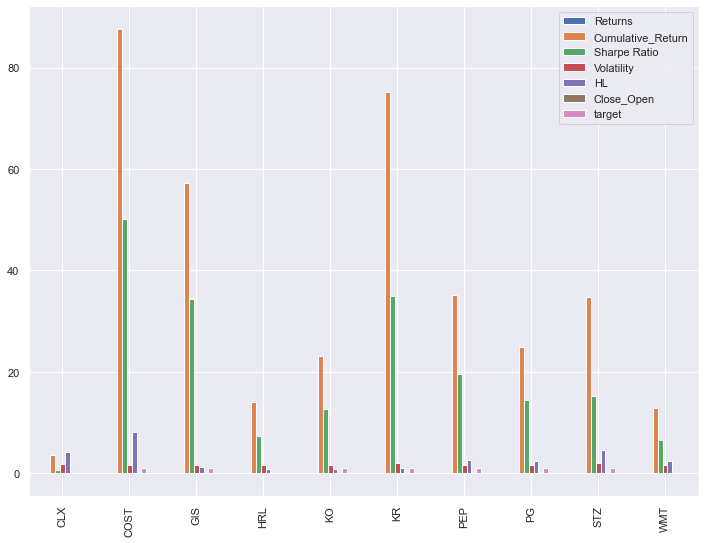

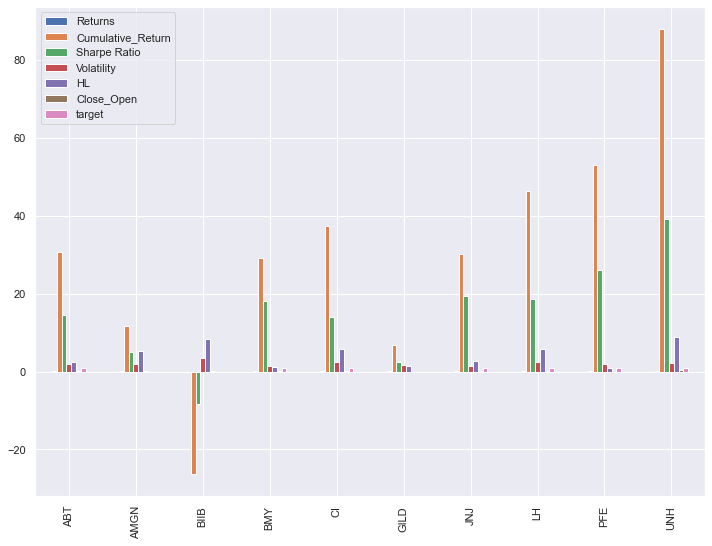

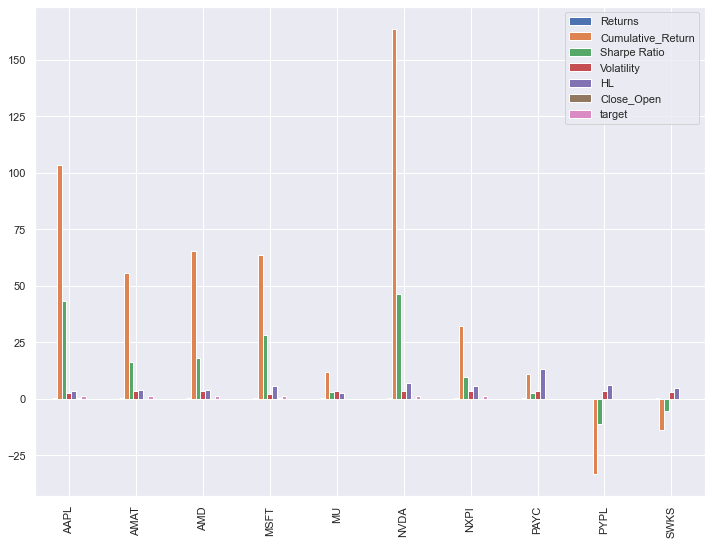

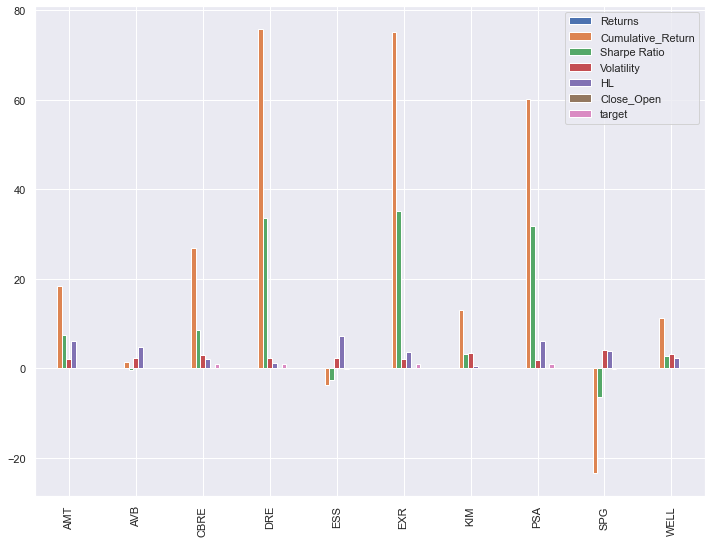

In [10]:
df_s2 = pd.read_csv('summary_stocks_s2.csv', index_col=0)
df_test = df_s2.groupby('gics_sector')
df_test.plot.bar(figsize = (12, 9))

In [19]:
#s2_df2 = s2_df[["ticker", "gics_sector" , "Cumulative_Return"]]
#s2_df2

In [21]:
s2_df3 = s2_df[[ "gics_sector" , "Cumulative_Return"]]
s2_df3

,gics_sector,Cumulative_Return
0,Consumer Discretionary,23.111699
46,Consumer Discretionary,736.935801
42,Consumer Discretionary,-6.425242
33,Consumer Discretionary,4.696690
7,Consumer Discretionary,19.651642
30,Consumer Discretionary,59.703875
23,Consumer Discretionary,40.829919
20,Consumer Discretionary,30.430089
18,Consumer Discretionary,-16.477639
16,Consumer Discretionary,24.292422


In [34]:
import hvplot
from hvplot import hvPlot
import hvplot.pandas

In [36]:
s2_df3.hvplot.line(x='gics_sector',y='Cumulative_Return')

:Curve   [gics_sector]   (Cumulative_Return)

In [44]:
file_path = "summary_stocks_s1.csv"
s1_df = pd.read_csv(file_path, index_col=[0])
s1_df.head(10)

,security,gics_sector,gics_sub_industries,Returns,Cumulative_Return,Sharpe Ratio,Volatility,HL,Close_Open,target
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,0.060492,23.111699,8.819745,2.343571,4.859828,-0.039296,1
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.138593,103.521256,43.353604,2.331508,3.147058,0.103834,1
ABT,Abbott,Health Care,Health Care Equipment,0.060635,30.640270,14.555148,1.937340,2.383271,0.013490,1
AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0.123611,55.683461,16.245430,3.277319,3.582410,-0.043255,1
AMD,AMD,Information Technology,Semiconductors,0.139396,65.193489,17.967950,3.492412,3.741674,-0.074444,1
AMGN,Amgen,Health Care,Biotechnology,0.033419,11.563616,5.036613,1.811061,5.213098,0.072958,0
AMT,American Tower,Real Estate,Specialized REITs,0.048524,18.283085,7.513248,2.108420,6.073678,0.056072,0
AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0.055853,19.651642,7.315081,2.352625,3.881307,-0.083993,1
AVB,AvalonBay Communities,Real Estate,Residential REITs,0.027686,1.288468,-0.510931,2.257708,4.685759,-0.057183,0
BIIB,Biogen,Health Care,Biotechnology,0.008555,-26.247281,-8.227594,3.486959,8.474240,0.147246,0


In [45]:
s1_df1 = s1_df[[ "gics_sector" , "Cumulative_Return"]]
s1_df1

,gics_sector,Cumulative_Return
AAP,Consumer Discretionary,23.111699
AAPL,Information Technology,103.521256
ABT,Health Care,30.640270
AMAT,Information Technology,55.683461
AMD,Information Technology,65.193489
AMGN,Health Care,11.563616
AMT,Real Estate,18.283085
AMZN,Consumer Discretionary,19.651642
AVB,Real Estate,1.288468
BIIB,Health Care,-26.247281


In [48]:
s1_df11 = s1_df1.sort_values("gics_sector")
s1_df11

,gics_sector,Cumulative_Return
AAP,Consumer Discretionary,23.111699
TSLA,Consumer Discretionary,736.935801
SBUX,Consumer Discretionary,-6.425242
NKE,Consumer Discretionary,4.696690
AMZN,Consumer Discretionary,19.651642
LOW,Consumer Discretionary,59.703875
HD,Consumer Discretionary,40.829919
F,Consumer Discretionary,30.430089
EXPE,Consumer Discretionary,-16.477639
EBAY,Consumer Discretionary,24.292422


In [46]:
import hvplot
from hvplot import hvPlot
import hvplot.pandas

In [49]:
s1_df11.hvplot.line(x='gics_sector',y='Cumulative_Return')

:Curve   [gics_sector]   (Cumulative_Return)

In [ ]:
pip install streamz


In [58]:
s1_df11.hvplot.line(x='Cumulative_Return', y=['gics_sector'], 
                value_label='% of Degrees Earned by Women', legend='top', height=500, width=620)

:Curve   [Cumulative_Return]   (gics_sector)

In [ ]:
from streamz.dataframe import Random

s2_df2 = Random(interval='200ms', freq='50ms')

In [ ]:
s2_df2

In [ ]:
s2_df2.

In [ ]:
# a scatter plot comparing segment 1 and segment 2
px.scatter(s2_df, x="ticker",y="Cumulative_Return")

In [ ]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="AAPL")
fig.show()